# Homework 3

This is an individual assignment.

**Due: Thursday, February 20, 11:59 PM**

## Grading Rubric

1. **Problem 1 (40 pts)** 
    * Problem 1.1 (2 points)
    * Problem 1.2 (2 points)
    * Problem 1.3 (3 points)
    * Problem 1.4 (3 points)
    * Problem 1.5 (7 points)
    * Problem 1.6 (6 points)
    * Problem 1.7 (3 points)
    * Problem 1.8 (7 points)
    * Problem 1.9 (6 points)
    * Problem 1.10 (1 point)

2. **Problem 2 (40 pts)** 
    * Problem 2.1 (2 points)
    * Problem 2.2 (3 points)
    * Problem 2.3 (3 points)
    * Problem 2.4 (10 points)
    * Problem 2.5 (5 points)
    * Problem 2.6 (12 points)
    * Problem 2.7 (5 points)

3. **Problem 3 (20 pts)** 
    * Problem 3.1 (5 points)
    * Problem 3.2 (5 points)
    * Problem 3.3 (5 points)
    * Problem 3.4 (5 points)

**Total: 100 pts**

# Feature Selection/Extraction, Classification & Evalution Metrics

In this assignment, you will experiment with different techniques for feature selection/extraction, perform classification using k-Nearest Neighbors algorithm and evaluate results using different evaluation metrics.

**You are allowed to use ```scikit-learn``` modules.**

You will be working with 3 data sets:

1. [MNIST Data Set](http://yann.lecun.com/exdb/mnist/) (download the files **"mnist_train.csv"** and **"mnist_test.csv"**)

2. [Iris Data Set](https://archive.ics.uci.edu/ml/datasets/iris)

3. [Breast Cancer Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer)

**Objectives**

By completing this assignment you will practice and master the following skills:

* Feature extraction, in particular, PCA and LDA
* Feature selection, in particular, SBS
* k-Nearest Neighbors algorithm
* Evaluation Metrics

**Create your Repo**

You can create the repo for this assignment by visiting the following link: https://classroom.github.com/a/AHgcazMd

# Problem 1: MNIST Data Set

In this problem, you will be working with the [MNIST Data Set](http://yann.lecun.com/exdb/mnist/) to extract features, perform classification using the K-Nearest Neighbors algorithm and evaluate your results using metrics such as accuracy, ROC curve and confusion matrices.

The MNIST data set contains $28\times 28$ images of handwritten digits (class labels 0, 1, 2, 3, 4, 5, 6, 7, 8 and 9). This data set has 60,000 images for training and 10,000 images for testing. Each image is a 8-bit grayscale image and so the intensity values per pixel range from 0-255.

The following code cell loads the MNIST data set and displays some examples. 
* Make sure you download the files **"mnist_train.csv"** and **"mnist_test.csv"**.

## Problem 1 Questions

To receive full marks in this assignment, address the following questions and implementation steps:

1. How many samples are there per class in training and test sets? 
    * Create and print a list that counts the number of class samples in training and test sets.
    * Without changing the training and test sets, comment on the class distribution among training and test sets. 
    * In this question you should address the generalization ability based on the number of examples per class.


2. Normalize each image to have intensity values to range between 0 and 1.


3. Create a PCA structure using ```scikit-learn``` functions and plot the explained variance ratio.
    * How many principal components would you have to extract in order to preserve 90% of the explained variance in the data?


4. Using ```imshow```, plot the first 9 principal components.
    * What is each principal component representing?
    
    
5. Project the input space into a 6-dimensional feature space using **PCA**. Train a k-NN classifier on the projected feature space. 
    * To successfully train your model, you should: (1) choose an evaluation metric, (2) for a set of $k$ values, train the k-NN and evaluate the results in the test set using your chosen metric, (3) pick the $k$ value that maximizes/minimizes your metric (an example of metric is *accuracy*).
   
   
6. For your choice of $k$, do: (1) compute the accuracy in both training and test sets, (2) print the confusion matrix, (3) plot the ROC curve for each class including the AUC (area under the curve) in the plot title, (4) plot the ROC for the overall classifier including the AUC (area under the curve) in the plot title, and (5) comment the final results.
    * Comments on the final classification results should include things like: dimensionality of feature space, limitations of PCA, interpretation of the confusion matrix, AUC of each class and overall usability of the model.

7. Create an LDA structure using ```scikit-learn``` functions and plot the explained variance ratio.
    * How many LDA directions would you have to extract in order to explain 90% of the data?
    
8. Project the input space into a 6-dimensional feature space using **LDA**. Train a k-NN classifier on the projected feature space. 
    * To successfully train your model, you should: (1) choose an evaluation metric, (2) for a set of $k$ values, train the k-NN and evaluate the results in  the test set using your chosen metric, (3) pick the $k$ value that maximizes/minimizes your metric (an example of metric is *accuracy*).

9. For your choice of $k$, do: (1) compute the accuracy in both training and test sets, (2) print the confusion matrix, (3) plot the ROC curve for each class including the AUC (area under the curve) in the plot title, (4) plot the ROC for the overall classifier including the AUC (area under the curve) in the plot title, and (5) comment the final results.
    * Comments on the final classification results should include things like: dimensionality of feature space, limitations of LDA, interpretation of the confusion matrix, AUC of each class and overall usability of the model.
    
10. Briefly discuss and compare the performance of both PCA and LDA on the MNIST data set (given the set of experiments you've conducted - questions 1-9).

**Problem 1**

(60000, 784) (60000,) (10000, 784) (10000,)
[5. 0. 4. 1. 9. 2. 1. 3. 1. 4.] [7. 2. 1. 0. 4. 1. 4. 9. 5. 9.]
(244,)
(234,)


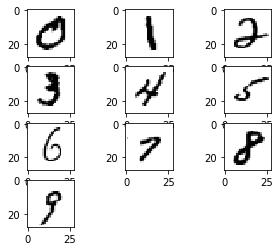

In [4]:
#NOTE: This cell is for loading data, preparing the setup, and making initial debugs to check out the shape of the data. 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Loading MNIST data set
image_size = 28 # width and length 
numLabels = 10 #  number of different labels i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

# Loading Training Samples
train_data = np.loadtxt("mnist_train.csv", delimiter=",") #2D numpy array 
X_train = train_data[:,1:] # matrix X: TRAINING SET with rows = observations and columns = features  
t_train = train_data[:,0] # t: TARGET SET for TRAINING e.g. the expected represented numbers 0, 1, 2, 3, ..., 9 

# Loading Test Samples
test_data = np.loadtxt("mnist_test.csv", delimiter=",") #2D numpy array 
X_test = test_data[:,1:] # matrix X: TESTING SET with rows = observations and columns = features  
t_test = test_data[:,0] # t: TARGET SET for TESTING e.g. the expected represented numbers 0, 1, 2, 3, ..., 9 
print(X_train.shape, t_train.shape, X_test.shape, t_test.shape) #Find the dimensionality of each matrix or vector 
print(t_train[:10], t_test[:10])#make sure that target vectors for both training and testing have values 0-9 
print(np.unique(ar=train_data[0:10, 1:].flatten()).shape) #check if initially binary or normalized - which is not  
print(np.unique(ar=test_data[0:10, 1:].flatten()).shape)

#simply displaying the images 
fig = plt.figure(figsize=(5,4))
for i in range(10):
    ax = fig.add_subplot(4,3,i+1)
    ax.imshow(X_train[np.where(t_train==i)[0][1],:].reshape((28,28)), cmap='binary')

    


In [313]:
####################################################################################################################
import statistics 

#1.1 
# How many samples are there per class in training and test sets?
# Create and print a list that counts the number of class samples in training and test sets.
# Without changing the training and test sets, comment on the class distribution among training and test sets.
# In this question you should address the generalization ability based on the number of examples per class.
class_count_train = np.zeros(shape=10) #count the frequency of each possible digit 0-9 that appears in TRAINING target vector 
for t in t_train.flatten(): 
    class_count_train[int(t)] += 1
    
class_count_test = np.zeros(shape=10) #count the frequency of each possible digit 0-9 that appears in TESTING target vector
for t in t_test.flatten(): 
    class_count_test[int(t)] += 1
    
print("Frequency distribution of classes 0-9 in TRAINING set:\n{}".format(class_count_train))
print("Mean:%d" % statistics.mean(t_train.flatten())) 
print("Variance:%d" % statistics.variance(t_train.flatten()))
print("Frequency distribution of classes 0-9 in TESTING set:\n{}".format(class_count_test)) 
print("Mean:%d" % statistics.mean(t_test.flatten()))
print("Variance:%d" % statistics.variance(t_test.flatten())) 


Frequency distribution of classes 0-9 in TRAINING set:
[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]
Mean:4
Variance:8
Frequency distribution of classes 0-9 in TESTING set:
[ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]
Mean:4
Variance:8


The frequency distribution of digits 0-9 in target vectors in both training and testing are roughly close to uniform given the large number of data values. The mean and variance also agree on a uniform distribution of integers 0-9, with mean = (b-a)/2 = (9-0)/2 = 4, and variance = (((b-a+1)^2)-1)/12 = (((9-0+1)^2)-1)/12 = 8 if rounded to integer. This means that no digit 0-9 will have noticeably more training time (or less training time) than any other digit. This consistency further backs the claim that a metric used to judge the accuracy of the training is based on the training strategy and not because of cherry picking or manipulating data with bias. 

In [294]:
from sklearn.preprocessing import normalize 

#1.2 
# Normalize each image to have intensity values to range between 0 and 1.
X_train.astype(dtype=float, copy=False)
normalize(X=X_train, axis=1, copy=False)

#making sure normalization worked 
print("Min value in normalized TRAINING set: %6.4f" % np.min(a=X_train.flatten())) 
print("Max value in normalized TRAINING set:%6.4f" % np.max(a=X_train.flatten()))


(60000, 784)
Min value in normalized TRAINING set: 0.0000
Max value in normalized TRAINING set:0.2790


Explained variance ratio:
[0.09377935 0.07257227 0.05851018 0.04955522 0.0466719  0.04088401
 0.03088525 0.02857019 0.0250152  0.02315093 0.02129961 0.0192373
 0.01754806 0.01628168 0.01524105 0.01442329 0.01301743 0.01246951
 0.01181796 0.0110497  0.01043177 0.01004906 0.00967837 0.00930259
 0.00908111 0.00878961 0.00805101 0.00795301 0.00760017 0.00736195
 0.00692916 0.00681977 0.00625269 0.00593316 0.00585818 0.0057278
 0.00540078 0.00531931 0.00511804 0.00501514 0.0047616  0.00462767
 0.00438985 0.00427271 0.00417984 0.00415146 0.0038998  0.00376512
 0.00366953 0.00341725 0.00337909 0.00332082 0.00318205 0.00309999
 0.00305819 0.00296486 0.00291409 0.00282948 0.00275195 0.00266065
 0.00259996 0.00256389 0.00249644 0.00241926 0.00236755 0.00229087
 0.00221905 0.00216128 0.00210861 0.00207936 0.00198234 0.00196937
 0.00191924 0.00188867 0.00180802 0.00177692 0.00173736 0.00170009
 0.0016363  0.00161168 0.0015619  0.00154339 0.00153534 0.00148239
 0.00146031 0.00144863 0.00141049 0.00

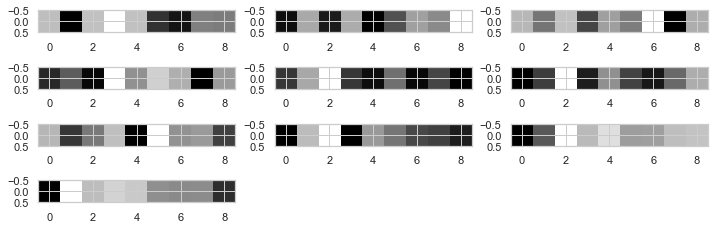

In [317]:
import numpy as np 
from sklearn.decomposition import PCA 

#1.3 
# Create a PCA structure using scikit-learn functions and plot the explained variance ratio.
# How many principal components would you have to extract in order to preserve 90% of the explained variance in the data?

pca=PCA(n_components=100, copy=True)
pca.fit_transform(X=X_train) #transformed matrix X, now having way less number of features
explainedRatio=pca.explained_variance_ratio_
explainedRatioCum=np.cumsum(a=explainedRatio)
print("Explained variance ratio:\n{}".format(explainedRatio)) 
print("Cumulative ratio of explained variance:\n{}".format(explainedRatioCum)) 

ninetyPercent=np.argwhere(explainedRatioCum>=0.90)[0]
print("0.90 (or more) explained variance needs this many features:%d" % ninetyPercent)
print("Precisely, having %d features explains %6.4f." % (ninetyPercent, explainedRatioCum[ninetyPercent]))

# 1.4
# Using imshow, plot the first 9 principal components. 
# What is each principal component representing?

topNine = PCA(n_components=9, copy=True).fit_transform(X=X_train) #first 9 components ranked in descending explained variance ratios 
fig2 = plt.figure(figsize=(12,4))
for i in range(10):
    ax = fig2.add_subplot(4,3,i+1)
    ax.imshow(topNine[np.where(t_train==i)[0][1],:].reshape((1, 9)), cmap='binary')
    



Each component in the 9 components is a specific pixel in the 28x28 flattened row representing each image. These 9 pixels relate more to the patterns in the digits 0-9 diplayed than any other set of pixels. Notice how that many of the images above possess a pair or triple of dark pixels; these correspond to characteristic markings on specific single digits such as the left and right edges. 

In [ ]:
# 1.5
# Project the input space into a 6-dimensional feature space using PCA. 
# Train a k-NN classifier on the projected feature space.
# To successfully train your model, you should: 
# (1) choose an evaluation metric, 
# (2) for a set of  𝑘  values, train the k-NN and evaluate the results in the test set using your chosen metric, 
# (3) pick the  𝑘  value that maximizes/minimizes your metric (an example of metric is accuracy).

from sklearn.decomposition import PCA 
from sklearn.neighbors import KNeighborsClassifier

pca_mnis=PCA(n_components=6, copy=True)
mnis_6=pca_mnis.fit_transform(X=X_train) #reduction to only 6 features 
print("Transformed X down to 6 features:\n{}".format(mnis_6))


knn_mnis=KNeighborsClassifier(n_neighbors=30, algorithm='auto', metric='minkowski', p=2)
knn_mnis.fit(X=X_train, y=t_train)
score_mnis=knn_mnis.score(X=X_test, y=t_test) #evaluation metric is accuracy (built-in function)
print("Accuracy:%6.4f" % score_mnis)


In [1]:
# 1.6
# For your choice of  𝑘 , do: 
# (1) compute the accuracy in both training and test sets, 
# (2) print the confusion matrix, 
# (3) plot the ROC curve for each class including the AUC (area under the curve) in the plot title, 
# (4) plot the ROC for the overall classifier including the AUC (area under the curve) in the plot title, and 
# (5) comment the final results. 

# Comments on the final classification results should include things like: dimensionality of feature space, limitations of PCA, interpretation of the confusion matrix, AUC of each class and overall usability of the model.

from sklearn.metrics import roc_curve

curv=roc_curve(y_true=t_test, y_score=knn_mnis.score) 
print(curv)


NameError: name 't_test' is not defined

In [ ]:

# 1.7 
# Create an LDA structure using scikit-learn functions and plot the explained variance ratio.
# How many LDA directions would you have to extract in order to explain 90% of the data?

import matplotlib.pyplot as plt 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

lda=PCA(n_components=100, copy=True)
lda.fit_transform(X=X_train, y=t_test) #transformed matrix X, now having way less number of features
explainedRatio2=lda.explained_variance_ratio_
explainedRatioCum2=np.cumsum(a=explainedRatio2)
print("Explained variance ratio:\n{}".format(explainedRatio2)) 
print("Cumulative ratio of explained variance:\n{}".format(explainedRatioCum2)) 

ninetyPercent2=np.argwhere(explainedRatioCum>=0.90)[0]
print("0.90 (or more) explained variance needs this many features:%d" % ninetyPercent2)
print("Precisely, having %d features explains %6.4f." % (ninetyPercent2, explainedRatioCum[ninetyPercent2]))

In [11]:
# 1.8 
# Project the input space into a 6-dimensional feature space using LDA. 
# Train a k-NN classifier on the projected feature space.

# To successfully train your model, you should: 
# (1) choose an evaluation metric, 
# (2) for a set of  𝑘  values, train the k-NN and evaluate the results in the test set using your chosen metric, 
# (3) pick the  𝑘  value that maximizes/minimizes your metric (an example of metric is accuracy).

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.neighbors import KNeighborsClassifier 

mnis_lda=LinearDiscriminantAnalysis(n_components=6)
lda_6=mnis_lda.fit_transform(X=X_train, y=t_train) 
print("Transformed X down to 6 features:\n{}".format(lda_6))


knn_mnis=KNeighborsClassifier(n_neighbors=30, algorithm='auto', metric='minkowski', p=2)
knn_mnis.fit(X=X_train, y=t_train)
score_mnis=knn_mnis.score(X=X_test, y=t_test)
print("Accuracy:%6.4f" % score_mnis)

Transformed X down to 6 features:
[[-0.90459877 -0.63847802 -1.75505615 -0.23832855  0.64229719  4.02829509]
 [-2.89955639 -3.3132971  -2.86590966 -0.13627512 -3.03271746 -0.48617749]
 [ 1.96972762  0.06783832  1.08427916  0.36864565  0.91484818 -1.49865758]
 ...
 [-0.03491826 -0.76497676 -0.52441152  2.57551308  1.42823494  2.39362818]
 [-1.31674031 -1.72338222  3.55852446 -0.37789607 -1.30574797  2.26788803]
 [-1.35364085 -0.84840293 -0.45166617  1.30857208  0.0797359   0.05819068]]
Accuracy:0.9596


In [ ]:
# 1.9 
# For your choice of  𝑘 , do: 
# (1) compute the accuracy in both training and test sets, 
# (2) print the confusion matrix, 
# (3) plot the ROC curve for each class including the AUC (area under the curve) in the plot title, 
# (4) plot the ROC for the overall classifier including the AUC (area under the curve) in the plot title, and 
# (5) comment the final results.

# Comments on the final classification results should include things like: dimensionality of feature space, 
# limitations of LDA, interpretation of the confusion matrix, AUC of each class and overall usability of the model.

cf=confusion_matrix(y_true=y_true_cf, y_pred=y_predicted_cf, labels=classes)

In [ ]:
# 1.10 
# Briefly discuss and compare the performance of both PCA and LDA on the MNIST data set (given the set of experiments you've conducted - questions 1-9).

# Problem 2: Iris Data Set

In this problem, you will be working with the [Iris Data Set](https://archive.ics.uci.edu/ml/datasets/iris).

The IRIS data set contains 4 feature descriptors (sepal length in cm, sepal width in cm, petal length in cm, petal width in cm) to characterize 3 species of Iris plants (class labels 0 - [Iris setosa](https://en.wikipedia.org/wiki/Iris_setosa), 1 - [Iris Versicolor](https://en.wikipedia.org/wiki/Iris_versicolor), and 2- [Iris Virginica](https://en.wikipedia.org/wiki/Iris_virginica)). The IRIS data set contains 150 samples each with 4 attributes/features.

The following code cell loads the IRIS data set.

In [45]:
#NOTE: This cell is for loading data, preparing the setup, and making initial debugs to check out the shape of the data. 
from sklearn.datasets import load_iris
import pandas as pd 

data = load_iris(return_X_y = False)

features=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] 
iris_df=pd.DataFrame(data=data['data'], columns=features)
iris_df['species']=data['target']
X_iris=iris_df.iloc[:, :len(iris_df.columns) - 1].to_numpy() #matrix X: TRAINING set comprised of 4 features, which are sepal length, sepal width, petal length, and petal width (cm) 
t_iris=iris_df['species'].to_numpy() #targets aligned with TRAINING set, and each element can be 0, 1, or 2 


print(X_iris.shape, t_iris.shape, np.unique(t_iris), data.target_names) 
print("\nIris Dataset as a DataFrame:\n{}".format(iris_df)) 
print("\nIris Dataset Observations (w/o targets):\n{}".format(X_iris)) 


(150, 4) (150,) [0 1 2] ['setosa' 'versicolor' 'virginica']

Iris Dataset as a DataFrame:
     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]

Iris Dataset Observations (w/o targets):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [

In [96]:
# Uncomment the following code line to print a data set description
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Problem 2 Questions

To receive full marks in this assignment, address the following questions and implementation steps:

1. Split the data randomly into training and test sets in an 80/20 split.
    * You may use the ```train_test_split``` function from ```scikit-learn```.

2. Plot the explained variance ratio of PCA projections in the training set.
     * How many principal components would you have to extract in order to preserve 90% of the explained variance in the data?

3. Plot the explained variance ratio of LDA projections in the training set.
     * How many LDA rojections would you have to extract in order to explain 90% of the data?

4. Project the both training and test sets into a 1-dimensional space using both PCA and LDA. Plot each 1-D projection for both PCA and LDA in a separate plot. Each class should have a different color and marker symbol. Plot should contain axis labels and legend.
    * You may want to plot the y-axis at a constant value, for example 0 (use the function ```np.zeros```).
    
5. Comment on the observations between the 1-D projections for both PCA and LDA.
    * To aid your discussion, compute the mean and variance of each class in the 1-D space.
    
6. Train a $K$-Nearest Neighbor classifier with $K=5$ neighbors using features created with PCA and LDA. Compute the accuracy in training and test, print the confusion matrices and compute the precision and recall (you may use the function ```precision_recall_fscore_support``` from ```scikit-learn```).
    * Which model performed the best? And why?
    * Make sure to comment on all computed measures.
    
7. What happens as you increase the number of neighbors $K$? decrease the number of neighbors $K$?

In [97]:
# 2.1
# Split the data randomly into training and test sets in an 80/20 split.
# You may use the train_test_split function from scikit-learn.

from sklearn.model_selection import train_test_split 

X_iris_train, X_iris_test, t_iris_train, t_iris_test = train_test_split(X_iris, t_iris, train_size=0.80)
print(X_iris_train.shape, X_iris_test.shape, t_iris_train.shape, t_iris_test.shape) #check for correct dimensions of paritioned TRAINING and TESTING sets 


(120, 4) (30, 4) (120,) (30,)


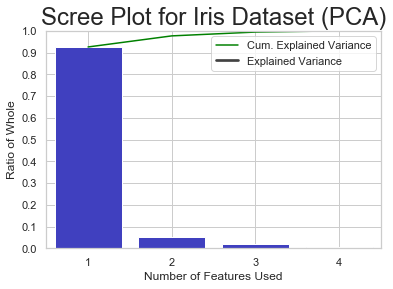

Cumulative Explained Variance:
[0.92594551 0.97688949 0.99447963 1.        ]
Explained Variance By Feature:
[('sepal_length', 0.6993604166666666), ('sepal_width', 0.1914888888888891), ('petal_length', 3.195930555555556), ('petal_width', 0.5940666666666665)]


In [164]:
# 2.2  
# Plot the explained variance ratio of PCA projections in the training set.
# How many principal components would you have to extract in order to preserve 90% of the explained variance in the data?
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
from sklearn.decomposition import PCA
%matplotlib inline 

#applying PCA method 
pca_iris = PCA(copy=True) 
pca_iris.fit_transform(X=X_iris_train)
pca_explainedRatio=pca_iris.explained_variance_ratio_ #explained ratios ranked descending 
pca_explainedRatioCum=np.cumsum(a=iris_explainedRatio)

sns.set(style='whitegrid')
sns.lineplot(x=np.arange(0, len(features)), y=pca_explainedRatioCum, color='green', markers='s')
sns.barplot(x=np.arange(1, len(features) + 1), y=pca_explainedRatio, color='blue', orient='v', saturation=0.5) 
plt.xlabel(xlabel='Number of Features Used')
plt.ylabel(ylabel='Ratio of Whole') 
plt.title(label='Scree Plot for Iris Dataset (PCA)', fontsize=24) 
plt.grid(b=True, which='Major', axis='both')
plt.ylim(0.0, 1.0)
plt.yticks(ticks=np.arange(0, 1.1, 0.1))
plt.legend(labels=['Cum. Explained Variance', 'Explained Variance'])
plt.show()

print("Cumulative Explained Variance:\n{}".format(pca_explainedRatioCum)) 
print("Explained Variance By Feature:\n{}"
      .format(list(zip(features, np.var(a=X_iris_train, axis=0)))))


Evidently, only 1 feature is good enough to explain >90% of the variance. That feature is the 3rd one, namely petal length. This is deduced by computing the variance of each feature without sorting and then finding the maximum variance among the 4 features. 

(2,) (2,)


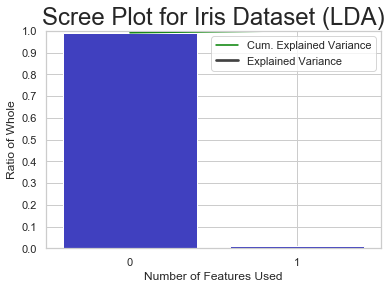

Cumulative Explained Variance:
[0.99127601 1.        ]
Explained Variance By Feature:
[('sepal_length', 0.6993604166666666), ('sepal_width', 0.1914888888888891), ('petal_length', 3.195930555555556), ('petal_width', 0.5940666666666665)]


In [146]:
# 2.3 
# Plot the explained variance ratio of LDA projections in the training set.
# How many LDA projections would you have to extract in order to explain 90% of the data?

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

#applying LDA method 
lda_iris=LinearDiscriminantAnalysis(solver='eigen') 
lda_iris.fit_transform(X=X_iris_train, y=t_iris_train)
lda_explainedRatio=lda_iris.explained_variance_ratio_
lda_explainedRatioCum=np.cumsum(a=lda_explainedRatio) 

print(lda_explainedRatio.shape, lda_explainedRatioCum.shape)

sns.set(style='whitegrid')
sns.lineplot(x=np.arange(2), y=lda_explainedRatioCum, color='green', markers='s')
sns.barplot(x=np.arange(2), y=lda_explainedRatio, color='blue', orient='v', saturation=0.5) 
plt.xlabel(xlabel='Number of Features Used')
plt.ylabel(ylabel='Ratio of Whole') 
plt.title(label='Scree Plot for Iris Dataset (LDA)', fontsize=24) 
plt.grid(b=True, which='Major', axis='both')
plt.ylim(0.0, 1.0)
plt.yticks(ticks=np.arange(0, 1.1, 0.1))
plt.legend(labels=['Cum. Explained Variance', 'Explained Variance'])
plt.show()

print("Cumulative Explained Variance:\n{}".format(lda_explainedRatioCum)) 
print("Explained Variance By Feature:\n{}"
      .format(list(zip(features, np.var(a=X_iris_train, axis=0)))))

Again, only one feature, namely petal length, is needed to classify a test sample with high accuracy. Since sklearn LDA has the constraint that the number of features after reduction must be min(#samples, #classes), only 2 features could be plotted. This does not matter much since the one highly discriminatory feature alone has a ratio of over 99%. It is obvious that when all training samples are projected onto this single axis, 3 distinct groups of points can be easily seen. 

(120,) (30,) (120,) (30,)
[  2.2148058  -18.54504857   3.97779085   1.72987859 -11.9873259
 -11.52475339 -10.07903976 -11.24316256 -11.38791819 -15.88370351
  -8.29344919   2.15004967 -12.04794171 -12.00616413   1.81487133
   2.45318147   1.89021143 -11.59273134 -10.73669438 -10.5557519
  -9.95248106   2.78010554 -18.38764754 -12.88776478 -16.71056909
 -18.35377293   1.41349929   1.07599125 -16.51608909   2.86746718]


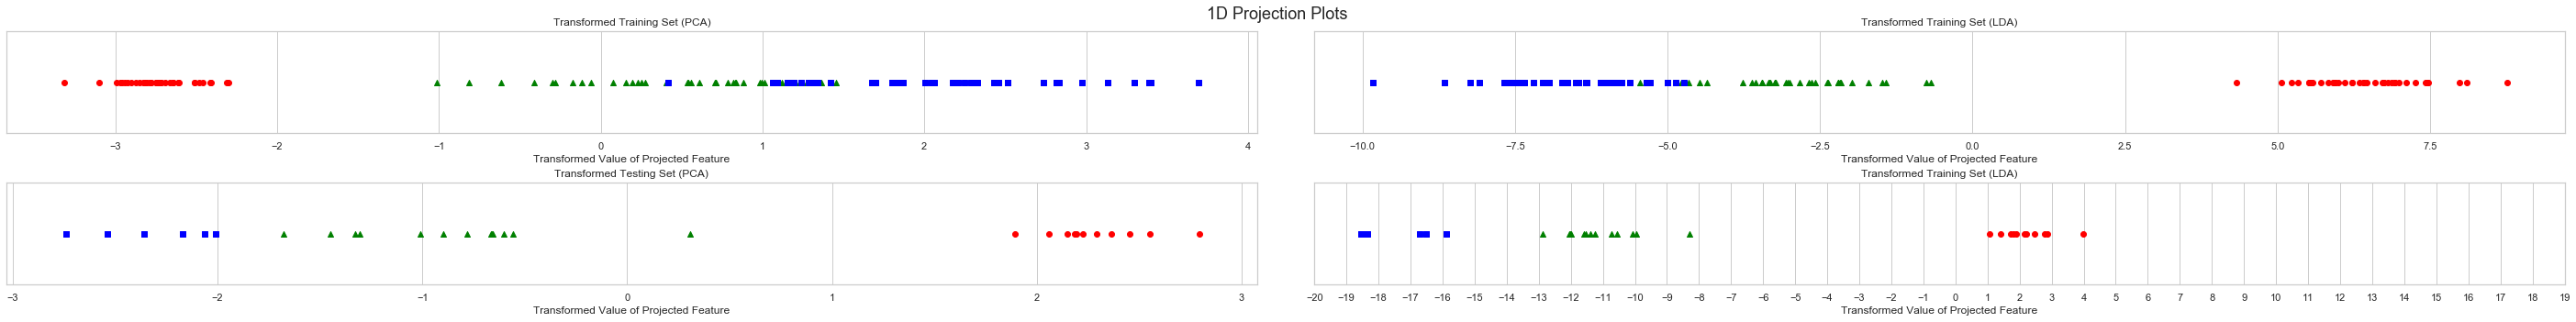

In [204]:
# 2.4 
# Project the both training and test sets into a 1-dimensional space using both PCA and LDA. 
# Plot each 1-D projection for both PCA and LDA in a separate plot. Each class should have a different color and marker symbol. 
# Plot should contain axis labels and legend.
# You may want to plot the y-axis at a constant value, for example 0 (use the function np.zeros).

import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.decomposition import PCA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
%matplotlib inline 

#creating 1D projections using PCA 
pca_iris_1d=PCA(n_components=1, copy=True)
pcaTrain=pca_iris_1d.fit_transform(X=X_iris_train).flatten()
pcaTest=pca_iris_1d.fit_transform(X=X_iris_test).flatten()

#creating 1D projections using LDA 
lda_iris_1d=LinearDiscriminantAnalysis(n_components=1, solver='eigen')
ldaTrain=lda_iris_1d.fit_transform(X=X_iris_train, y=t_iris_train).flatten() 
ldaTest=lda_iris_1d.fit_transform(X=X_iris_test, y=t_iris_test).flatten() 

#separation by classes using indices belonging to each class 
#training set 
setosa_train=np.argwhere(t_iris_train==0)
versicolor_train=np.argwhere(t_iris_train==1)
virginica_train=np.argwhere(t_iris_train==2)

#testing set 
setosa_test=np.argwhere(t_iris_test==0)
versicolor_test=np.argwhere(t_iris_test==1)
virginica_test=np.argwhere(t_iris_test==2)

#checking that dimensions were preserved / consistent with before 
print(pcaTrain.shape, pcaTest.shape, ldaTrain.shape, ldaTest.shape) 

#plots 
fig, axes = plt.subplots(nrows=2, ncols=2, squeeze=False, figsize=(40, 5))
fig.suptitle(t='1D Projection Plots', fontsize=18)
fig.tight_layout(pad=3.0)

#1D Projection PCA Training Set 
axes[0, 0].scatter(pcaTrain[setosa_train], np.zeros(shape=len(setosa_train)), color='red', marker='o')
axes[0, 0].scatter(pcaTrain[versicolor_train], np.zeros(shape=len(versicolor_train)), color='green', marker='^')
axes[0, 0].scatter(pcaTrain[virginica_train], np.zeros(shape=len(virginica_train)), color='blue', marker='s')
axes[0, 0].title.set_text('Transformed Training Set (PCA)') 
axes[0, 0].set_xlabel(xlabel='Transformed Value of Projected Feature')
axes[0, 0].get_yaxis().set_visible(False)

#1D Projection PCA Testing Set 
axes[1, 0].scatter(pcaTest[setosa_test], np.zeros(shape=len(setosa_test)), color='red', marker='o')
axes[1, 0].scatter(pcaTest[versicolor_test], np.zeros(shape=len(versicolor_test)), color='green', marker='^')
axes[1, 0].scatter(pcaTest[virginica_test], np.zeros(shape=len(virginica_test)), color='blue', marker='s')
axes[1, 0].title.set_text('Transformed Testing Set (PCA)')
axes[1, 0].set_xlabel(xlabel='Transformed Value of Projected Feature')
axes[1, 0].get_yaxis().set_visible(False)

#1D Projection LDA Training Set 
axes[0, 1].scatter(ldaTrain[setosa_train], np.zeros(shape=len(setosa_train)), color='red', marker='o')
axes[0, 1].scatter(ldaTrain[versicolor_train], np.zeros(shape=len(versicolor_train)), color='green', marker='^')
axes[0, 1].scatter(ldaTrain[virginica_train], np.zeros(shape=len(virginica_train)), color='blue', marker='s')
axes[0, 1].title.set_text('Transformed Training Set (LDA)') 
axes[0, 1].set_xlabel(xlabel='Transformed Value of Projected Feature')
axes[0, 1].get_yaxis().set_visible(False)

#1D Projection LDA Testing Set 
axes[1, 1].scatter(ldaTest[setosa_test], np.zeros(shape=len(setosa_test)), color='red', marker='o')
axes[1, 1].scatter(ldaTest[versicolor_test], np.zeros(shape=len(versicolor_test)), color='green', marker='^')
axes[1, 1].scatter(ldaTest[virginica_test], np.zeros(shape=len(virginica_test)), color='blue', marker='s')
axes[1, 1].title.set_text('Transformed Training Set (LDA)') 
axes[1, 1].set_xlabel(xlabel='Transformed Value of Projected Feature')
axes[1, 1].get_yaxis().set_visible(False)

plt.xticks(ticks=np.arange(-20, 20, 1))
plt.grid(b=True, which='major', axis='x')
plt.show()


In [248]:
# 2.5 
# Comment on the observations between the 1-D projections for both PCA and LDA.
# To aid your discussion, compute the mean and variance of each class in the 1-D space. 

from statistics import mean
import numpy as np 
import pandas as pd 

#computing statistical parameters 
classes=['setosa', 'versicolor', 'virginica']
stats_df=pd.DataFrame(data={
'PCA Mean (Training)':[mean(pcaTrain[setosa_train].flatten()), mean(pcaTrain[versicolor_train].flatten()), mean(pcaTrain[virginica_train].flatten())],
'PCA Mean (Testing)':[mean(pcaTest[setosa_test].flatten()), mean(pcaTest[versicolor_test].flatten()), mean(pcaTest[virginica_test].flatten())],
'LDA Mean (Training)':[mean(ldaTrain[setosa_train].flatten()), mean(ldaTrain[versicolor_train].flatten()), mean(ldaTrain[virginica_train].flatten())], 
'LDA Mean (Testing)':[mean(ldaTest[setosa_test].flatten()), mean(ldaTest[versicolor_test].flatten()), mean(ldaTest[virginica_test].flatten())], 
'PCA Variance (Training)':[mean(pcaTrain[setosa_train].flatten()), mean(pcaTrain[versicolor_train].flatten()), mean(pcaTrain[virginica_train].flatten())],  
'PCA Variance (Testing)':[mean(pcaTest[setosa_test].flatten()), mean(pcaTest[versicolor_test].flatten()), mean(pcaTest[virginica_test].flatten())], 
'LDA Variance (Training)':[mean(ldaTrain[setosa_train].flatten()), mean(ldaTrain[versicolor_train].flatten()), mean(ldaTrain[virginica_train].flatten())], 
'LDA Variance (Testing)':[mean(ldaTest[setosa_test].flatten()), mean(ldaTest[versicolor_test].flatten()), mean(ldaTest[virginica_test].flatten())]
}, 
index=classes)

print(stats_df)


            PCA Mean (Training)  PCA Mean (Testing)  LDA Mean (Training)  \
setosa                -2.729906            2.287670             6.410652   
versicolor             0.458172           -0.867865            -2.925435   
virginica              2.034408           -2.313689            -6.618704   

            LDA Mean (Testing)  PCA Variance (Training)  \
setosa                2.215259                -2.729906   
versicolor          -11.099629                 0.458172   
virginica           -17.399472                 2.034408   

            PCA Variance (Testing)  LDA Variance (Training)  \
setosa                    2.287670                 6.410652   
versicolor               -0.867865                -2.925435   
virginica                -2.313689                -6.618704   

            LDA Variance (Testing)  
setosa                    2.215259  
versicolor              -11.099629  
virginica               -17.399472  


Although centering and standardization are used in both PCA and LDA, the LDA process produced more drastic (less centered to the origin) means and higher variances. PCA has the means of the 3 classes closer together since PCA, unlike LDA, does not care about the distances between means. LDA, however, tries to both find the features linked with the highest explained variances as well as design the projection axes to enlarge the distance between class means. Looking at the 4 plots above, the right side uses LDA and has clearly distinguishable clusters. Meanwhile, the left side which uses PCA contains some overlap since maximizing the gap between class means is not implemented in PCA. 


In [312]:
# 2.6 
# Train a  𝐾 -Nearest Neighbor classifier with  𝐾=5  neighbors using features created with PCA and LDA. 
# Compute the accuracy in training and test, print the confusion matrices and compute the precision and recall 
# (you may use the function precision_recall_fscore_support from scikit-learn). 

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_recall_fscore_support 

knn_iris=KNeighborsClassifier(n_neighbors=5, algorithm='auto', metric='minkowski', p=2)
pcaTrain=pcaTrain.reshape(120, 1)
t_iris_train=t_iris_train.flatten()
pcaTest=pcaTest.reshape(30, 1)
t_iris_test=t_iris_test.flatten()

knn_iris.fit(X=pcaTrain, y=t_iris_train)

t_iris_predicted=knn_iris.predict(X=pcaTest)
for i in range(len(t_iris_predicted)):
    if(t_iris_predicted[i]==2):
        t_iris_predicted[i]=0
    elif(t_iris_predicted[i]==0):
        t_iris_predicted[i]=2
print("Test Targets:\n{}".format(t_iris_test))
print("Predicted:\n{}".format(t_iris_predicted))

class_dict={0:'setosa', 1:'versicolor', 2:'virginica'}
y_true_cf=list(map(lambda x : class_dict[x], t_iris_test))
y_predicted_cf=list(map(lambda x : class_dict[x], t_iris_predicted))

cf=confusion_matrix(y_true=y_true_cf, y_pred=y_predicted_cf, labels=classes)
print("Confusion Matrix:\n{}".format(cf))

score=precision_recall_fscore_support(y_true=t_iris_test, y_pred=t_iris_predicted)
print("Score:\n{}".format(score))

Test Targets:
[0 2 0 0 1 1 1 1 1 2 1 0 1 1 0 0 0 1 1 1 1 0 2 1 2 2 0 0 2 0]
Predicted:
[0 2 0 0 1 1 1 1 1 2 1 0 2 1 0 0 0 1 1 1 1 0 2 1 2 2 0 0 2 0]
Confusion Matrix:
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Score:
(array([1.        , 1.        , 0.85714286]), array([1.        , 0.92307692, 1.        ]), array([1.        , 0.96      , 0.92307692]), array([11, 13,  6]))


In [275]:
# 2.7 
# What happens as you increase the number of neighbors  𝐾 ? decrease the number of neighbors  𝐾 ?

Increasing K increases the accuracy (using K-fold validation for example) up until some point. When K becomes way too big, such as covering over half of the sample size of all classes combined, several things can go wrong. First, computational resources are more strained. Second, in order to fulfill K neighbors, the search radius might extend to the "home" territory of faraway classes that would not be considered as a label if K were smaller. This starts to collect extra unhelpful information from the test set. If K were too small, then the influence of outliers would crample the accuracy. If a test sample was close to an outlier, the outlier might determine its new class label since neighbors from the true class could not be reached with a tiny K. 

# Problem 3 - Breast Cancer Data Set

In this problem, you will be working with the [Breast Cancer Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer).

The Breast Cancer data set contains 30 feature descriptors (mean, standard error, and "worst" or largest of radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, fractal dimension) to characterize cell types as benign (class 1) or malignant (class 0). The Breast Cancer data set contains 569 samples each with 30 attributes/features.

The following code cell loads the Breast Cancer data set.

In [16]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(return_X_y=False)

X_cancer = data.data
t_cancer = data.target

print(X.shape, t_cancer.shape, np.unique(t_cancer), data.target_names)
print(X_cancer, t_cancer)

(569, 30) (569,) [0 1] ['malignant' 'benign']
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 

In [17]:
# Uncomment the following code line to print a data set description
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

## Problem 3 Questions

To receive full marks in this assignment, address the following questions and implementation steps:

1. Suppose you are performing classification using the k-NN algorithm. Would you be able to perform feature selection using L1-norm penalty? Why?

2. Run Sequential Backward Selection (SBS) on the provided data set. (You may use the code for SBS presented in lecture 7.)
    * How many (and which) features will you keep?
    
3. Run the k-NN classifier on the selected features. Report the results in the test set using accuracy measure and confusion matrix.
    * Split the data into training and test using a 80/20 split respectively.

4. Compare the results when using all 30 features versus the selected features. What do you observe?

In [ ]:
# 3.1
# Suppose you are performing classification using the k-NN algorithm. Would you be able to perform feature selection using L1-norm penalty? Why?

Yes. L1 in terms of distance actually corresponds to Manhattan distance. This is more robust in avoiding the effects of outliers when compared to l2 (Euclidean). 

In [13]:
#  3.2
# Run Sequential Backward Selection (SBS) on the provided data set. (You may use the code for SBS presented in lecture 7.)
# How many (and which) features will you keep? 

from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features,
        scoring=accuracy_score,test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score
    


In [26]:
# 3.3
# Run the k-NN classifier on the selected features. Report the results in the test set using accuracy measure and confusion matrix.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix 

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X=X_cancer, y=t_cancer)
sbs10=SBS(estimator=knn, k_features=10)
sbs10.fit(X=X_cancer, y=t_cancer)
sbs10.transform(X=X_cancer)

classes_cancer=[0, 1] 
cf_cancer=confusion_matrix(y_true=knn.predict(X=X_cancer), y_pred=t_cancer, labels=classes_cancer) #confusion matrix 
score=knn.score(X=X_cancer, y=t_cancer)
print("Confusion Matrix:\n{}".format(cf_cancer))
print("Score:\n{}".format(score)) #Accuracy 

NameError: name 'X_train2' is not defined

In [23]:
# 3.4
# Split the data into training and test using a 80/20 split respectively.
# Compare the results when using all 30 features versus the selected features. What do you observe?

from sklearn.model_selection import train_test_split
X_train3, X_test3, t_train3, t_test3 = train_test_split(X_cancer, t_cancer, train_size=0.80)
sbs30=SBS(knn, k_features=30)
sbs30.fit(X=X_train3, y=t_train3)
sbs30.transform(X=X_train3)


array([[1.345e+01, 1.830e+01, 8.660e+01, ..., 7.911e-02, 2.678e-01,
        6.603e-02],
       [2.092e+01, 2.509e+01, 1.430e+02, ..., 2.542e-01, 2.929e-01,
        9.873e-02],
       [1.669e+01, 2.020e+01, 1.071e+02, ..., 8.737e-02, 4.677e-01,
        7.623e-02],
       ...,
       [1.189e+01, 1.736e+01, 7.620e+01, ..., 8.946e-02, 2.220e-01,
        6.033e-02],
       [1.239e+01, 1.748e+01, 8.064e+01, ..., 9.804e-02, 2.819e-01,
        1.118e-01],
       [1.420e+01, 2.053e+01, 9.241e+01, ..., 1.339e-01, 2.534e-01,
        7.858e-02]])

## Submit your Solution

Along with your Jupyter Notebook answers, create a PDF of the notebook with your solutions.

As always, `add` and `commit` the final version of your work, and `push` your code to your GitHub repository.

* Submit the **URL** of your GitHub Repository as your assignment submission on Canvas.